In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
video = 'July/videos/video_capture_2024-07-01_09-08-21.mp4'
_, image = cv2.VideoCapture(video).read()
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

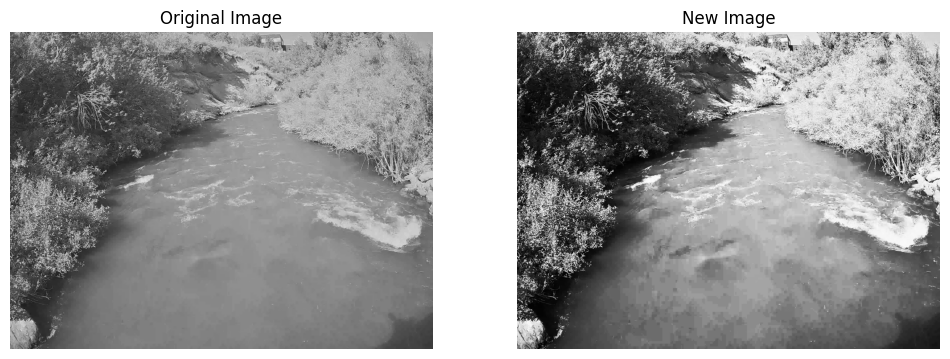

In [16]:
# histogram equalization
equalized_image = cv2.equalizeHist(image)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('New Image')
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
plt.close()

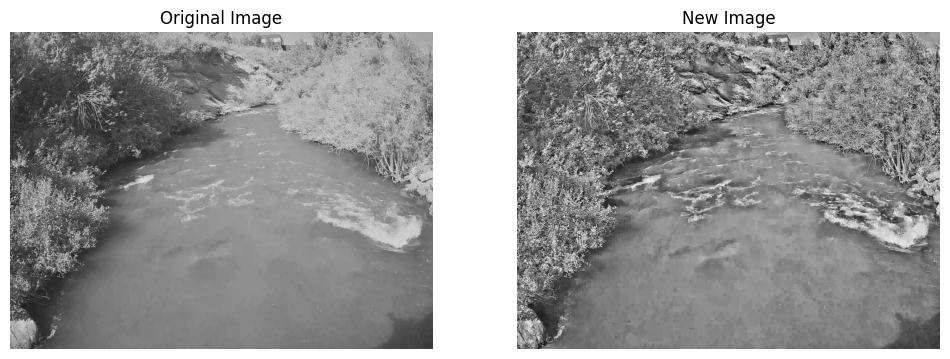

In [17]:
# CLAHE
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(32, 32))

clahe_image = clahe.apply(image)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('New Image')
plt.imshow(cv2.cvtColor(clahe_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
plt.close()

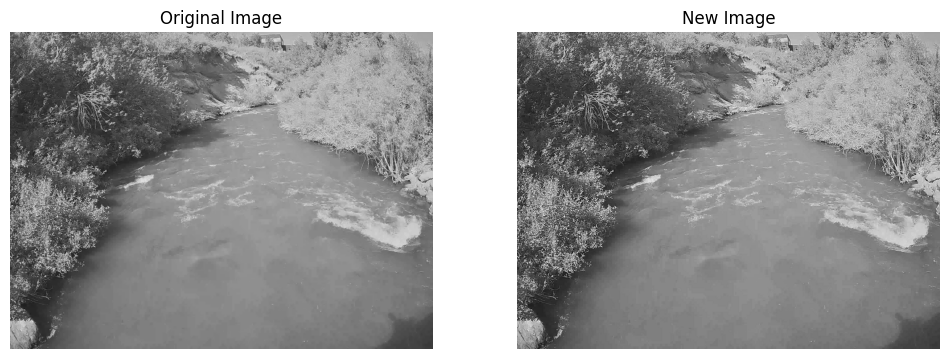

In [18]:
# Create a Gaussian blurred image
blurred = cv2.GaussianBlur(image, (9, 9), 10.0)

# Subtract the blurred image from the original image
unsharp_image = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('New Image')
plt.imshow(cv2.cvtColor(unsharp_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
plt.close()

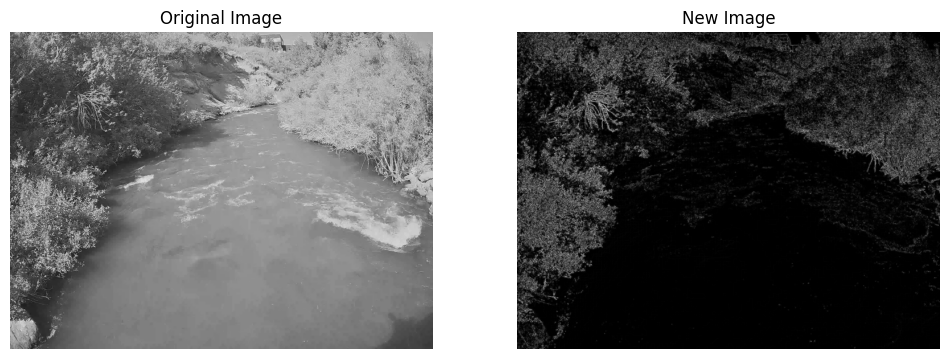

In [19]:
# Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convert back to 8-bit image
laplacian = cv2.convertScaleAbs(laplacian)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('New Image')
plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
plt.close()

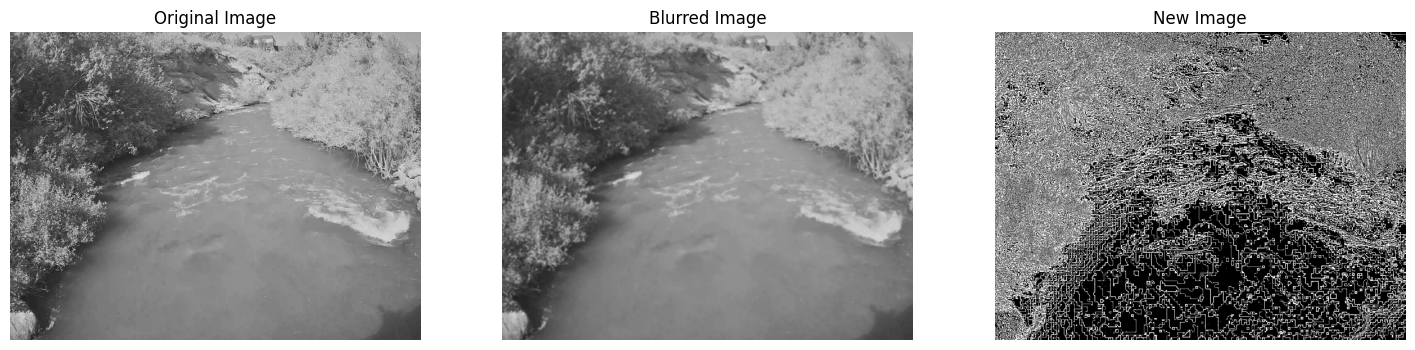

In [20]:
# Create a Gaussian blurred image
blurred = cv2.GaussianBlur(image, (21, 21), 0)

# Subtract the blurred image from the original image to get high-pass
high_pass = image - blurred


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Blurred Image')
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('New Image')
plt.imshow(cv2.cvtColor(high_pass, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
plt.close()

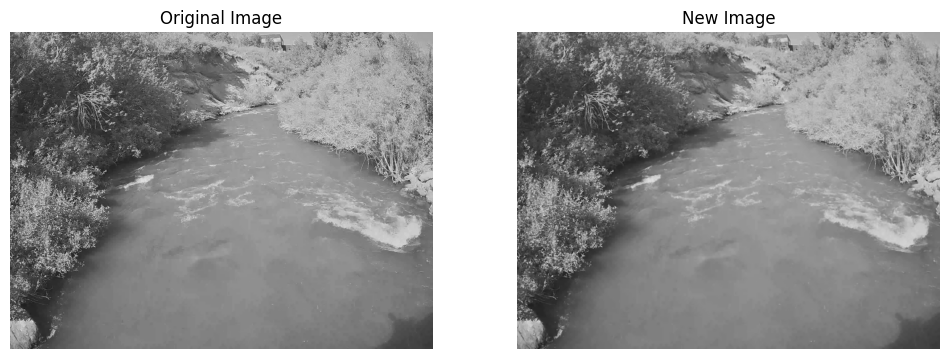

In [21]:
# Apply bilateral filter
bilateral = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('New Image')
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
plt.close()

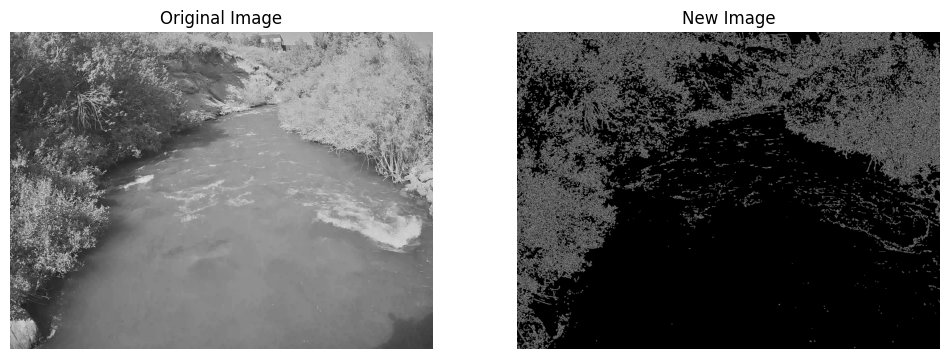

In [22]:
# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('New Image')
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
plt.close()

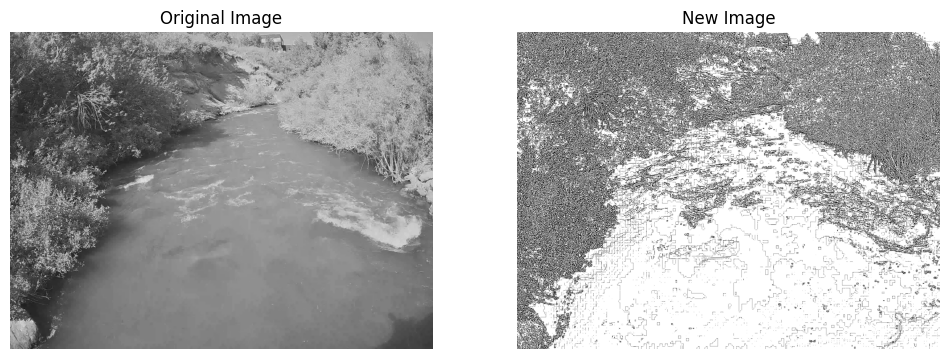

In [23]:
# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('New Image')
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
plt.close()

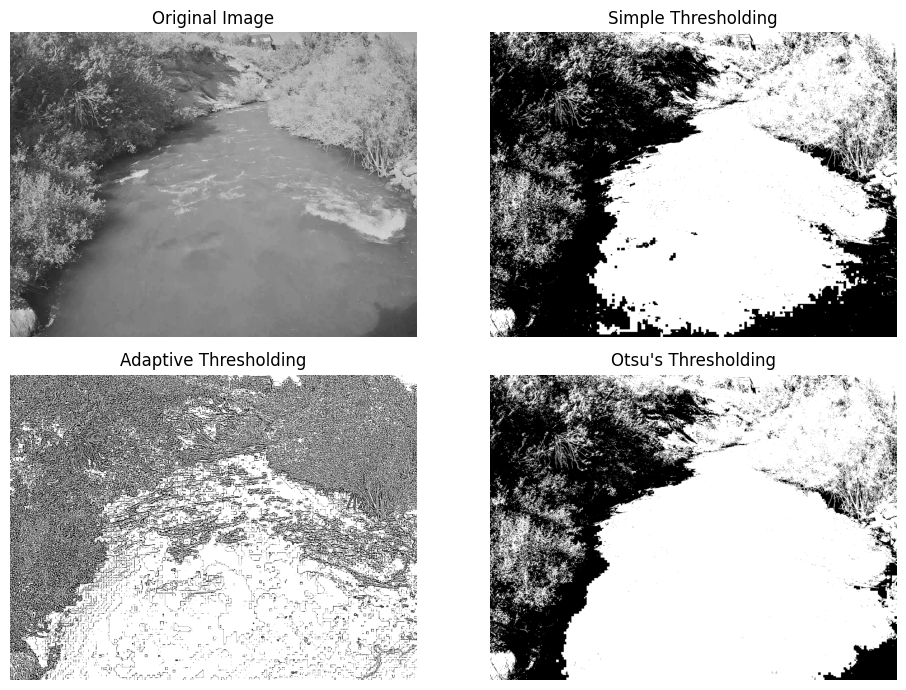

In [24]:
# Simple thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Adaptive thresholding
adaptive_threshold = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Otsu's thresholding
_, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display images
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Simple Thresholding')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Adaptive Thresholding')
plt.imshow(adaptive_threshold, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Otsu\'s Thresholding')
plt.imshow(otsu_threshold, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


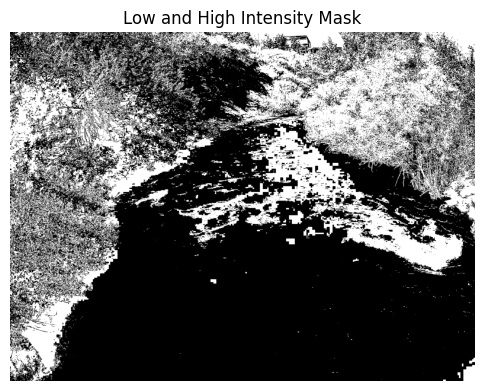

In [25]:
low_threshold = 64
high_threshold = 157 # 223

# Use cv2.inRange to capture low and high intensity ranges
low_high_mask = cv2.inRange(image, 0, low_threshold) | cv2.inRange(image, high_threshold, 255)

# Display the result
plt.figure(figsize=(6, 6))
plt.title('Low and High Intensity Mask')
plt.imshow(low_high_mask, cmap='gray')
plt.axis('off')
plt.show()


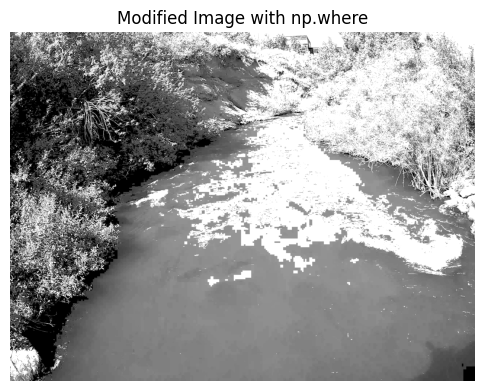

In [26]:
low_threshold = 64
high_threshold = 150

# Modify the image using np.where
modified_image_np = np.where(image < low_threshold, 0, np.where(image > high_threshold, 255, image))

# Display the result
plt.figure(figsize=(6, 6))
plt.title('Modified Image with np.where')
plt.imshow(modified_image_np, cmap='gray')
plt.axis('off')
plt.show()
